## Import packages

In [364]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import seaborn as sns
import pandas as pd
import sys
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error

## Load the data

In [87]:
x0_df = pd.read_csv("data/linear_vectorfield_data_x0.txt", names=["x0", "y0"])
x1_df = pd.read_csv("data/linear_vectorfield_data_x1.txt", names=["x1", "y1"])
x0_np = np.loadtxt("data/linear_vectorfield_data_x0.txt")
x1_np = np.loadtxt("data/linear_vectorfield_data_x1.txt")

## Part 1
Description: Estimate the linear vector field that was used to generate the points $x_{1}$ from the points $x_{0}$ 

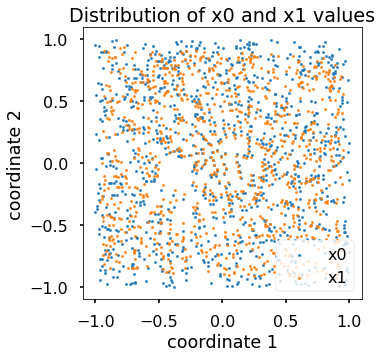

In [91]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(x0_np[:,0], x0_np[:, 1], s = 5, label='x0')
ax.scatter(x1_np[:,0], x1_np[:, 1], s = 5, label="x1")
ax.set_xlabel("coordinate 1")
ax.set_ylabel("coordinate 2")
ax.set_title("Distribution of x0 and x1 values")
ax.legend()

Description: Solve the linear system and compute the mean squared error. Use the finite difference formula below to estimate vectors $v^{(k)}$ at all points $x^{k}_{o}$ with a time step $\Delta$ t that will minimize the error

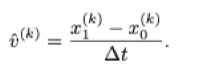

use numpy.linalg.lstsq Return the least-squares solution to a linear matrix equation.

In [90]:
delta_t = 1
v = (x1_np - x0_np) / delta_t
A = np.linalg.lstsq(x0_np, v_est, rcond=None)[0]
print(A)

[[-0.04935524 -0.04638232]
 [ 0.02319115 -0.09573757]]


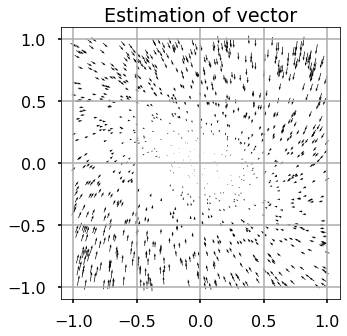

In [99]:
fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot()
ax2.quiver(x0_np[:,0], x0_np[:,1], v[:,0], v[:,1], pivot='mid') # create quiver plot
ax2.set_title("Estimation of vector")
ax2.grid()

fig2.savefig('Part1_estimationVector', dpi=150)

## Part 2

solutin you get out of ode is not the actual solutiono, need to access the solution object for x and y

f (x,y) = x * A

In [231]:
nr = x0_np.shape[0]
eq = lambda t, x: A @ x
x1_sol = np.zeros((nr, 2))
for i in range(nr):
    x1_sol[i, :] = solve_ivp(eq, t_span=[0, 0.2], t_eval=[0.1], y0=x0_np[i, :]).y.reshape(-1)

In [241]:
eq

<function __main__.<lambda>(t, x)>

In [222]:
# define time span
t_span = (0, 1)  # start and end times

In [223]:
def f(x, A):
    return A * x
v0=0

In [224]:
def Sys(x0_np, t=0):
    # here X[0] = x and x[1] = y    
    x_dot = x0_np@A
    return np.array([x_dot])

In [349]:
def ode(t, x0_np):
    dx = x0_np*A
    return dx

In [350]:
ode

<function __main__.ode(t, x0_np)>

In [351]:
# define a grid and compute direction at each point
x = np.linspace(-1, 1, 20)
t = np.linspace(0,0.05,1)

X1  = np.meshgrid(x)                    # create a grid
DX1= Sys([x0_np])                       # compute growth rate on the grid
#M = (np.hypot(DX1))                     # norm growth rate 
#M[ M == 0] = 1.                         # avoid zero division errors 
#DX1 /= M                                # normalize each arrows

In [352]:
# define initial values
y0_0 = (0.25, 0.25)

In [367]:
for i in range(0,len(x0_np)):
    sol[i, :] = solve_ivp(ode, t_span=[0, 0.2], t_eval=[0.1], y0=x0_np[i, :])

ValueError: could not broadcast input array from shape (2,2) into shape (2)

try euler method

In [380]:
def solve_euler(f_ode, y0, time):
    """
    Solves the given ODE system in f_ode using forward Euler.
    :param f_ode: the right hand side of the ordinary differential equation d/dt x = f_ode(x(t)).
    :param y0: the initial condition to start the solution at.
    :param time: np.array of time values (equally spaced), where the solution must be obtained.
    :returns: (solution[time,values], time) tuple.
    """
    yt = np.zeros((len(time), len(y0)))
    yt[0, :] = y0
    step_size = time[1]-time[0]
    for k in range(1, len(time)):
        yt[k, :] = yt[k-1, :] + step_size * f_ode(yt[k-1, :])
    return yt, time

In [384]:
t = np.linspace(0,0.05,1)
solve_euler(ode, x0_np, t)

ValueError: could not broadcast input array from shape (1000,2) into shape (1000)

In [368]:
print('Mean squared error:' % mean_squared_error(sol, x0_np))

NameError: name 'sol' is not defined

## Part three:

Visualize the trajectory as well as the phase portrait

### Phase portrait

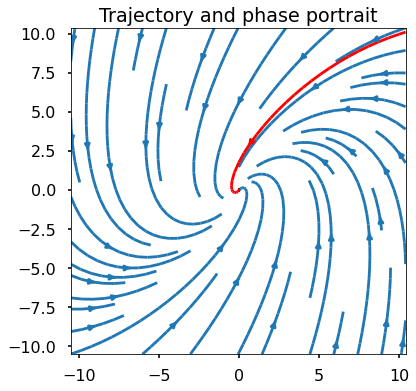

In [422]:
# define notebook parameters
x, y = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
UV = np.array([X.ravel(), Y.ravel()])
AUV = np.matmul(A, XY)
U = AXY[0].reshape(X.shape)
V = AXY[1].reshape(Y.shape)

fig3 = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
ax3 = fig3.add_subplot()
ax3 = plt.streamplot(X, Y, U, V, density=[0.5, 1])
ax3 = plt.streamplot(X, Y, U, V,start_points=[(10,10)], color='red')

#plt.scatter(x_list[0],x_list[1],c='red')
ax3 = plt.title('Trajectory and phase portrait')

fig3.savefig('Part1_trajectoryphase', dpi=150)